In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# HIDDEN
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

### Correlation ###

In this section we will develop a measure of how tightly clustered a scatter diagram is about a straight line. Formally, this is called measuring *linear association*.

### The correlation coefficient ###

The *correlation coefficient* measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter diagram is around a straight line.

The term *correlation coefficient* isn't easy to say, so it is usually shortened to *correlation* and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by simulation.

- The correlation coefficient $r$ is a number between $-1$ and 1.
- $r$ measures the extent to which the scatter plot clusters around a straight line.
- $r = 1$ if the scatter diagram is a perfect straight line sloping upwards, and $r = -1$ if the scatter diagram is a perfect straight line sloping downwards.

The function ``r_scatter`` takes a value of $r$ as its argument and simulates a scatter plot with a correlation very close to $r$. Because of randomness in the simulation, the correlation is not expected to be exactly equal to $r$.

Call ``r_scatter`` a few times, with different values of $r$ as the argument, and see how the scatter plot changes. 

When $r=1$ the scatter plot is perfectly linear and slopes upward. When $r=-1$, the scatter plot is perfectly linear and slopes downward. When $r=0$, the scatter plot is a formless cloud around the horizontal axis, and the variables are said to be *uncorrelated*.

In [12]:
_ = interact(r_scatter, r=(-1, 1, 0.1))

A Jupyter Widget

### Calculating $r$ ###

The formula for $r$ is not apparent from our observations so far. It has a mathematical basis that is outside the scope of this class. However, as you will see, the calculation is straightforward and helps us understand several of the properties of $r$.

**Formula for $r$**:

**$r$ is the average of the products of the two variables, when both variables are measured in standard units.**

Here are the steps in the calculation. We will apply the steps to a simple table of values of $x$ and $y$.

In [17]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


Based on the scatter diagram, we expect that $r$ will be positive but not equal to 1.

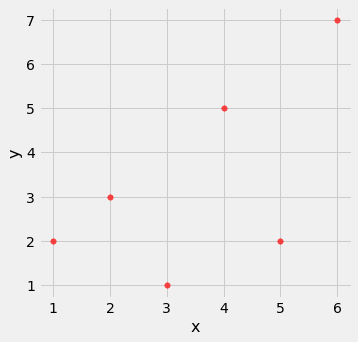

In [18]:
t.scatter(0, 1, s=30, color='red')

**Step 1.** Convert each variable to standard units.

In [19]:
t_su = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t_su

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


**Step 2.** Multiply each pair of standard units.

In [20]:
t_product = t_su.with_column('product of standard units', t_su.column(2) * t_su.column(3))
t_product

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


**Step 3.** $r$ is the average of the products computed in Step 2.

In [21]:
# r is the average of the products of standard units

r = np.mean(t_product.column(4))
r

0.61741639718977093

As expected, $r$ is positive but not equal to 1.

### Properties of $r$

The calculation shows that:

- $r$ is a pure number. It has no units. This is because $r$ is based on standard units.
- $r$ is unaffected by changing the units on either axis. This too is because $r$ is based on standard units.
- $r$ is unaffected by switching the axes. Algebraically, this is because the product of standard units does not depend on which variable is called $x$ and which $y$. Geometrically, switching axes reflects the scatter plot about the line $y=x$, but does not change the amount of clustering nor the sign of the association.

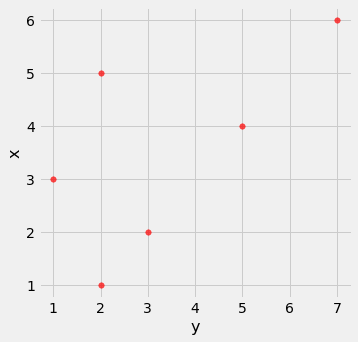

In [22]:
t.scatter('y', 'x', s=30, color='red')

### The `correlation` function ###
We are going to be calculating correlations repeatedly, so it will help to define a function that computes it by performing all the steps described above. Let's define a function ``correlation`` that takes a table and the labels of two columns in the table. The function returns $r$, the mean of the products of those column values in standard units.

In [23]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

Let's call the function on the ``x`` and ``y`` columns of ``t``. The function returns the same answer to the correlation between $x$ and $y$ as we got by direct application of the formula for $r$. 

In [24]:
correlation(t, 'x', 'y')

0.61741639718977093

As we noticed, the order in which the variables are specified doesn't matter.

In [25]:
correlation(t, 'y', 'x')

0.61741639718977093

Calling ``correlation`` on columns of the table ``suv`` gives us the correlation between price and mileage as well as the correlation between price and acceleration.

In [26]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [27]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

These values confirm what we had observed: 

- There is a negative association between price and efficiency, whereas the association between price and acceleration is positive.
- The linear relation between price and acceleration is a little weaker (correlation about 0.5) than between price and mileage (correlation about -0.67). 

Correlation is a simple and powerful concept, but it is sometimes misused. Before using $r$, it is important to be aware of what correlation does and does not measure.